In [2]:
import numpy as np
import xarray as xr
import os.path as op
import xgcm.grid as xgd
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs/res10km_2804/'

In [6]:
dsFe = open_mdsdataset(ddir, grid_dir=op.join(ddir, '../'), 
                       iters=range(259344,828144,144),
                       prefix=['FeT_tave'], delta_t=6e2
                      )
dsFe

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:   (XC: 100, XG: 100, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, time: 3950)
Coordinates:
  * XC        (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * YC        (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XG        (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * YG        (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z         (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
  * Zp1       (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zu        (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * Zl        (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    rA        (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dxG       (YG, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    dyG       (YC, XG) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth     (YC

In [7]:
grid = xgd.Grid(dsFe, periodic=['x'])
grid

<xgcm.Grid>
X Axis (not periodic):
  * center   XC (100) --> left
  * left     XG (100) --> center
Y Axis (not periodic):
  * center   YC (200) --> left
  * left     YG (200) --> center
Z Axis (not periodic):
  * center   Z (40) --> left
  * left     Zl (40) --> center
  * outer    Zp1 (41) --> center
  * right    Zu (40) --> center
T Axis (not periodic):
  * center   time (3950)

In [8]:
fe = dsFe.TRAC03
fe.attrs = dsFe.TRAC03.attrs
fe

<xarray.DataArray 'TRAC03' (time: 3950, Z: 40, YC: 200, XC: 100)>
dask.array<shape=(3950, 40, 200, 100), dtype=float32, chunksize=(1, 40, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 200, 100), chunksize=(40, 200, 100)>
    iter     (time) int64 dask.array<shape=(3950,), chunksize=(1,)>
  * time     (time) float64 1.556e+08 1.557e+08 1.558e+08 1.559e+08 1.56e+08 ...
Attributes:
    standard_name:  TRAC03
    long_name:      FeT concentration
    

In [9]:
dfedz = grid.diff(fe, 'Z', **{'boundary':'extend'}
                 )[:,1:]/dsFe.drC[1:-1].data[np.newaxis,:,np.newaxis,np.newaxis]
dfedz

<xarray.DataArray (time: 3950, Zl: 39, YC: 200, XC: 100)>
dask.array<shape=(3950, 39, 200, 100), dtype=float64, chunksize=(1, 39, 200, 100)>
Coordinates:
  * time     (time) float64 1.556e+08 1.557e+08 1.558e+08 1.559e+08 1.56e+08 ...
  * Zl       (Zl) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...

In [10]:
dfedz.attrs['unit'] = 'mM m^-4'
saveds = dfedz.to_dataset(name='dfedz')

In [11]:
nzFe = np.nanargmax(dfedz, axis=1)

In [12]:
saveds['nzFerriCore'] = xr.DataArray(nzFe,dims=['time','YC','XC'],
                                    coords={'time':dfedz.time.data,
                                           'YC':dfedz.YC.data,
                                           'XC':dfedz.XC.data}
                                    )
saveds

<xarray.Dataset>
Dimensions:      (XC: 100, YC: 200, Zl: 39, time: 3950)
Coordinates:
  * time         (time) float64 1.556e+08 1.557e+08 1.558e+08 1.559e+08 ...
  * Zl           (Zl) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
  * YC           (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
  * XC           (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 ...
Data variables:
    dfedz        (time, Zl, YC, XC) float64 dask.array<shape=(3950, 39, 200, 100), chunksize=(1, 39, 200, 100)>
    nzFerriCore  (time, YC, XC) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

In [13]:
saveds.to_netcdf(op.join(ddir,'Vertical-differentiation_Fe_6-15yr.nc'))

In [23]:
temporary = fe * dsFe.hFacC * dsFe.drF
temporary

<xarray.DataArray (time: 3950, Z: 40, YC: 200, XC: 100)>
dask.array<shape=(3950, 40, 200, 100), dtype=float32, chunksize=(1, 40, 200, 100)>
Coordinates:
  * XC       (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    rA       (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    Depth    (YC, XC) >f4 dask.array<shape=(200, 100), chunksize=(200, 100)>
    drF      (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    PHrefC   (Z) >f4 dask.array<shape=(40,), chunksize=(40,)>
    hFacC    (Z, YC, XC) >f4 dask.array<shape=(40, 200, 100), chunksize=(40, 200, 100)>
    iter     (time) int64 dask.array<shape=(3950,), chunksize=(1,)>
  * time     (time) float64 1.556e+08 1.557e+08 1.558e+08 1.559e+08 1.56e+08 ...

In [ ]:
N = nzFe.shape
iron_abv_zFe = np.zeros_like(nzFe)

for t in range(N[0]):
    for y in range(N[1]):
        for x in range(N[2]):
            iron_abv_zFe[t,y,x] = temporary[t,:int(nzFe[t,y,x]+1),y,x].sum(['Z']).data
            
iron_abv_zFe = xr.DataArray(iron_abv_zFe, dims=fe[:,0].dims, coords=fe[:,0].coords)
iron_abv_zFe

In [ ]:
iron_abv_mon = xr.DataArray(iron_abv_zFe.data[:3600].reshape((10,360,200,100)),
                           dims=['iYEAR','iDAY','YC','XC'],
                           coords={'iYEAR':range(10),'iDAY':range(360),
                                  'YC':fe.YC.data,'XC':fe.XC.data}
                           )
t_bin = range(0,390,30)
iron_abv_mon = iron_abv_mon.groupby_bins('iDAY', t_bin, right=False
                                        ).mean(['iDAY','iYEAR']).compute()
iron_abv_mon

NameError: name 'iron_abv_mon' is not defined

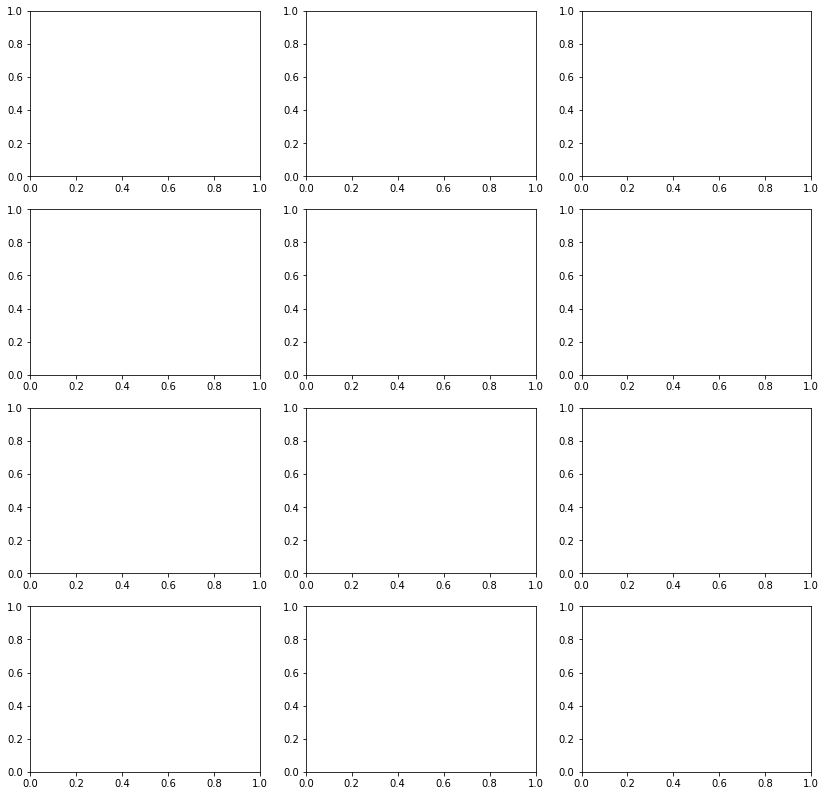

In [25]:
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(14,14))
cax = axes[0,0].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[0], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[0,1].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[1], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[0,2].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[2], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)

axes[1,0].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[3], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[1,1].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[4], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[1,2].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[5], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)

axes[2,0].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[6], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[2,1].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[7], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[2,2].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[8], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)

axes[3,0].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[9], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[3,1].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[10], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)
axes[3,2].pcolormesh(iron_abv_mon.lon, iron_abv_mon.lat, iron_abv_mon[11], 
                     vmin=0., vmax=1e-4, 
                     rasterized=True)

axes[0,0].set_title('Jan',fontsize=14)
axes[0,1].set_title('Feb',fontsize=14)
axes[0,2].set_title('Mar',fontsize=14)
axes[1,0].set_title('Apr',fontsize=14)
axes[1,1].set_title('May',fontsize=14)
axes[1,2].set_title('Jun',fontsize=14)
axes[2,0].set_title('Jul',fontsize=14)
axes[2,1].set_title('Aug',fontsize=14)
axes[2,2].set_title('Sep',fontsize=14)
axes[3,0].set_title('Oct',fontsize=14)
axes[3,1].set_title('Nov',fontsize=14)
axes[3,2].set_title('Dec',fontsize=14)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84, 0.2, 0.03, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label(r'[mol Fe/m$^2$]',fontsize=12)

fig.text(0.06, 0.5, 'Latitude', 
         va='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.09, 'Longitude', 
         va='center', rotation='horizontal', fontsize=15)

plt.savefig(op.join(ddir,'surfaceironconcentration_3D2804-monthlyclim.pdf'))